In [12]:
!pip install polars
!pip install japanize_matplotlib
!pip install --user --force-reinstall pyarrow

  Using cached pyarrow-22.0.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (3.2 kB)
Using cached pyarrow-22.0.0-cp312-cp312-manylinux_2_28_x86_64.whl (47.7 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 22.0.0
    Uninstalling pyarrow-22.0.0:
      Successfully uninstalled pyarrow-22.0.0


In [13]:
import os
import polars as pl
from matplotlib import pyplot as plt
# plt.rcParams['font.family'] = ['IPAexGothic']
import japanize_matplotlib

In [14]:
df_pos = pl.read_csv('./data/pos.csv', encoding='utf-8-sig')
df_product = pl.read_csv('./data/product.csv', encoding='utf-8-sig')
df_weather = pl.read_csv('./data/weather.csv', encoding='utf-8-sig')

In [15]:
(df_pos
 .with_columns(
     pl.col("datetime")
       .str.strptime(pl.Datetime, "%Y/%m/%d %H:%M")
       .dt.month()
       .alias("month")
 )
 .group_by(["month", "product_name"])
 .agg(pl.col("amount").sum().alias("total_amount"))
 .sort(["month", "total_amount"], descending=[False, True])
 .group_by("month")
 .head(1)       # 各月のトップ1を抽出
 .sort("month")
)


month,product_name,total_amount
i8,str,i64
1,"""温かいうどん弁当""",457380
2,"""温かいうどん弁当""",354480
3,"""野菜たっぷり豚しゃぶ弁当""",254880
4,"""鮭の塩焼き弁当""",223600
5,"""野菜たっぷり豚しゃぶ弁当""",246240
…,…,…
8,"""崎陽軒風シウマイ弁当""",189600
9,"""冷製パスタ弁当""",229320
10,"""野菜たっぷり豚しゃぶ弁当""",279360


<Axes: xlabel='product_name'>

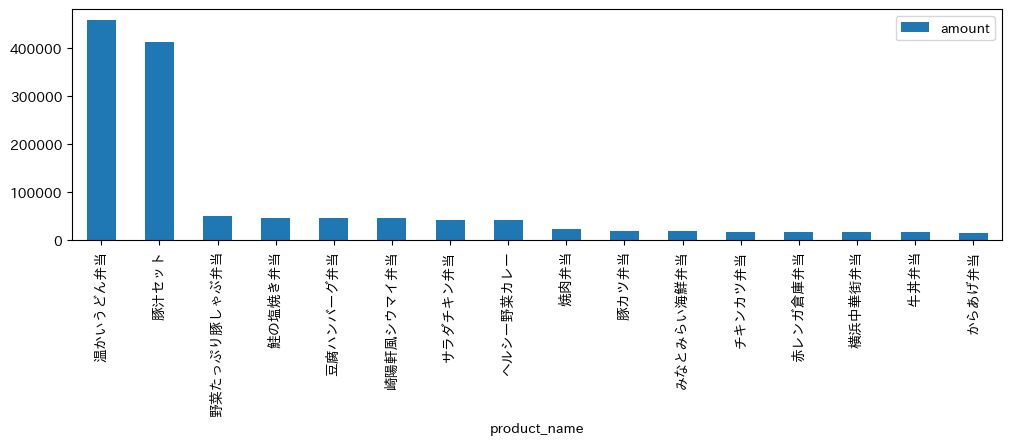

In [16]:
#1月の商品ごとの売上
(df_pos
 .with_columns(
     pl.col("datetime")
       .str.strptime(pl.Datetime, "%Y/%m/%d %H:%M")
       .dt.month()
       .alias("month")
 )
 .filter(pl.col("month") == 1)                     # 先に絞る
 .group_by("product_name")                         # 次にグループ化
 .agg(pl.col("amount").sum().alias("amount"))      # 集計
 .sort("amount", descending=True)
 .to_pandas()
 .plot(kind="bar", x="product_name", y="amount", figsize=(12, 3))
)


<Axes: xlabel='hour'>

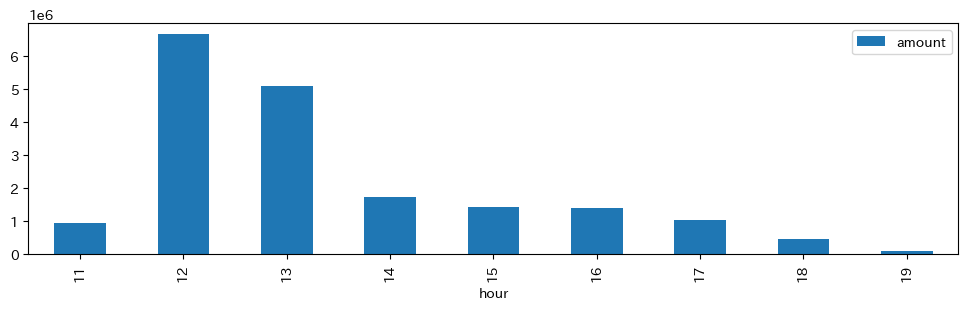

In [17]:
#年間の時間ごとの売上
(df_pos
 .with_columns(
     pl.col("datetime")
       .str.strptime(pl.Datetime, "%Y/%m/%d %H:%M")
       .dt.hour()
       .alias("hour")
 )
 .group_by("hour")                                 # 時間ごとに集計
 .agg(pl.col("amount").sum().alias("amount"))
 .sort("hour")                                     # 時間順に並べる
 .to_pandas()
 .plot(kind="bar", x="hour", y="amount", figsize=(12, 3))
)
#昼メインの売店

<Axes: xlabel='month'>

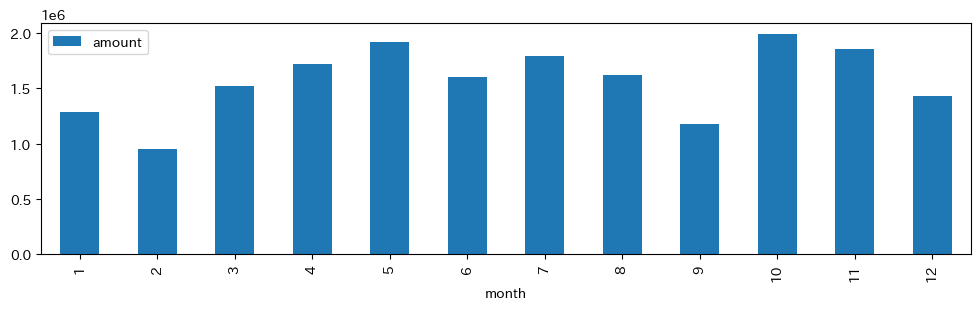

In [18]:
#月ごとの全体売上
(df_pos
 .with_columns(
     pl.col("datetime")
       .str.strptime(pl.Datetime, "%Y/%m/%d %H:%M")
       .dt.month()
       .alias("month")
 )
 .group_by("month")                                # 月ごとに集計
 .agg(pl.col("amount").sum().alias("amount"))
 .sort("month")                                    # 月順に並べる
 .to_pandas()
 .plot(kind="bar", x="month", y="amount", figsize=(12, 3))
)


In [19]:
df_year = (
    df_pos
    .with_columns(
        pl.col("datetime")
            .str.strptime(pl.Datetime, "%Y/%m/%d %H:%M")
            .dt.month()
            .alias("month")
    )
    .group_by(["month", "product_name"])
    .agg(pl.col("amount").sum().alias("amount"))
    .sort(["month", "amount"], descending=[False, True])
)

df_year


month,product_name,amount
i8,str,i64
1,"""温かいうどん弁当""",457380
1,"""豚汁セット""",412300
1,"""野菜たっぷり豚しゃぶ弁当""",51120
1,"""鮭の塩焼き弁当""",46800
1,"""豆腐ハンバーグ弁当""",46020
…,…,…
12,"""みなとみらい海鮮弁当""",25300
12,"""チキンカツ弁当""",22260
12,"""豚カツ弁当""",20160


<Axes: xlabel='hour'>

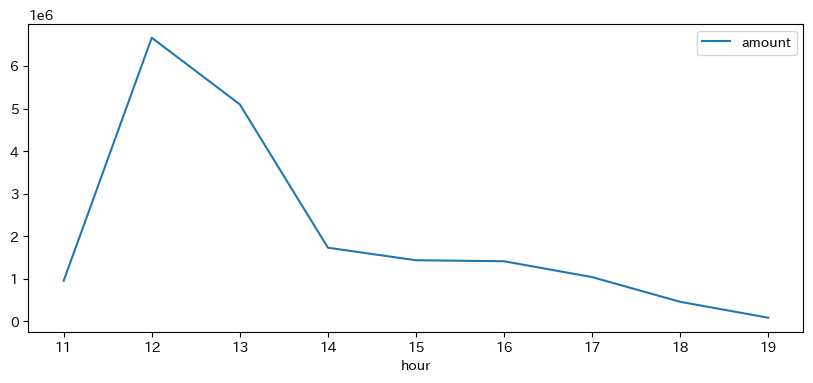

In [20]:
df_hour = (
    df_pos
    .with_columns(
        pl.col("datetime")
          .str.strptime(pl.Datetime, "%Y/%m/%d %H:%M")
          .dt.hour()
          .alias("hour")
    )
    .group_by("hour")
    .agg(pl.col("amount").sum().alias("amount"))
    .sort("hour")
    .to_pandas()
)

df_hour.plot(kind='line', x='hour', y='amount', figsize=(10, 4))


/tmp/ipykernel_1819/2506044355.py:12: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  .pivot(


<Axes: xlabel='month'>

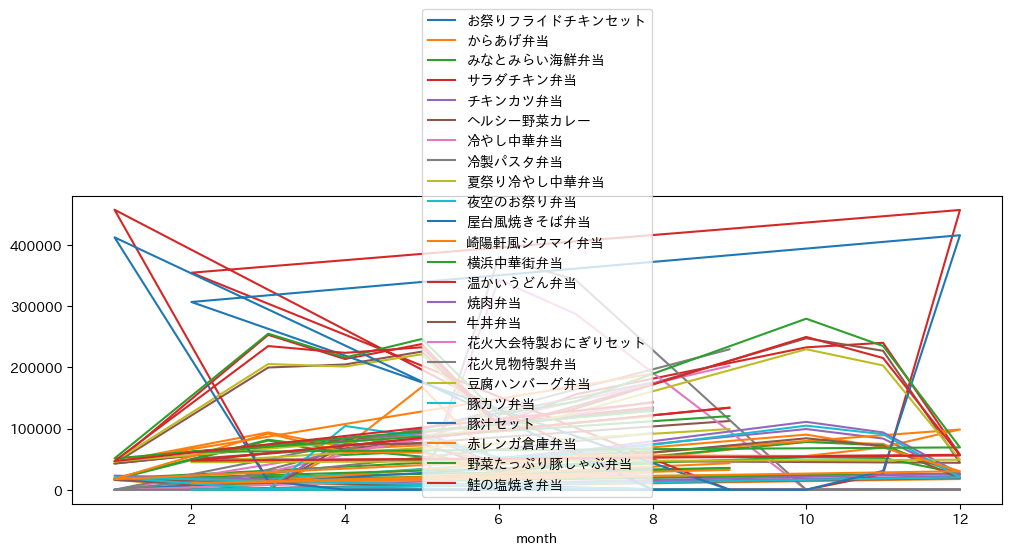

In [21]:
df_year = (
    df_pos
    .with_columns(
        pl.col("datetime")
            .str.strptime(pl.Datetime, "%Y/%m/%d %H:%M")
            .dt.month()
            .alias("month")
    )
    .group_by(["month", "product_name"])
    .agg(pl.col("amount").sum().alias("amount"))
    .sort(["product_name", "month"])
    .pivot(
        values="amount",
        index="month",
        columns="product_name"
    )
    .to_pandas()
    .fillna(0)   # 欠損補完
)

df_year.plot(kind='line', x='month', figsize=(12, 4))


/tmp/ipykernel_1819/1473244170.py:30: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  .pivot(


<Axes: xlabel='month'>

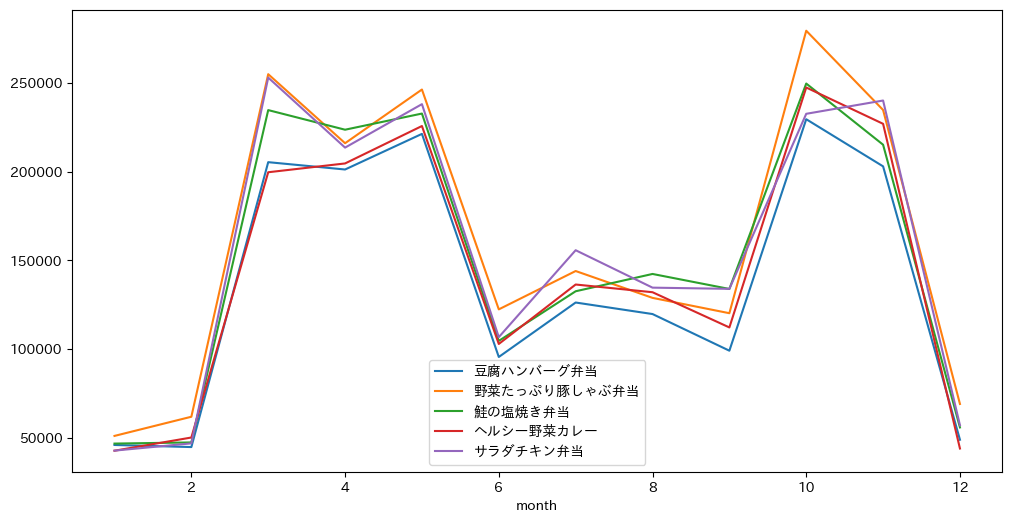

In [22]:
# --- ① 月×商品別の売上を集計 ---
df_month_prod = (
    df_pos
    .with_columns(
        pl.col("datetime")
            .str.strptime(pl.Datetime, "%Y/%m/%d %H:%M")
            .dt.month()
            .alias("month")
    )
    .group_by(["month", "product_name"])
    .agg(pl.col("amount").sum().alias("amount"))
)

# --- ② 年間売上トップ5商品を取得 ---
top5_products = (
    df_month_prod
    .group_by("product_name")
    .agg(pl.col("amount").sum().alias("year_amount"))
    .sort("year_amount", descending=True)
    .head(5)
    .select("product_name")
    .to_series()
    .to_list()
)

# --- ③ トップ5のみを抽出してピボット（行：月 / 列：商品）---
df_top5 = (
    df_month_prod
    .filter(pl.col("product_name").is_in(top5_products))
    .pivot(
        values="amount",
        index="month",
        columns="product_name"
    )
    .to_pandas()
    .fillna(0)
)

# --- ④ 折れ線グラフで表示 ---
df_top5.plot(kind="line", x="month", figsize=(12, 6))


<Axes: xlabel='product_name'>

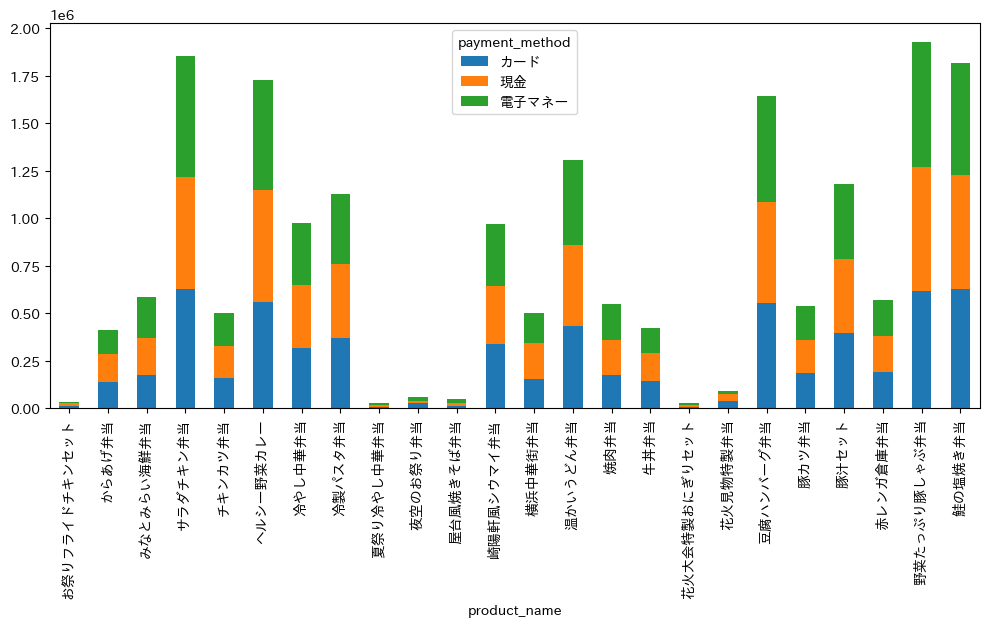

In [23]:
df_year = (
    df_pos
    .with_columns(
        pl.col("datetime")
          .str.strptime(pl.Datetime, "%Y/%m/%d %H:%M")
          .dt.year()                      # 年を抽出
          .alias("year")
    )
    .group_by(["product_name", "payment_method"])  
    .agg(
        pl.col("amount").sum().alias("amount")
    )
    .sort("amount", descending=True)
)

df_plot = df_year.to_pandas().pivot(
    index="product_name",
    columns="payment_method",
    values="amount"
)

df_plot.plot(
    kind="bar",
    stacked=True, 
    figsize=(12, 5)
)


<Axes: xlabel='product_name'>

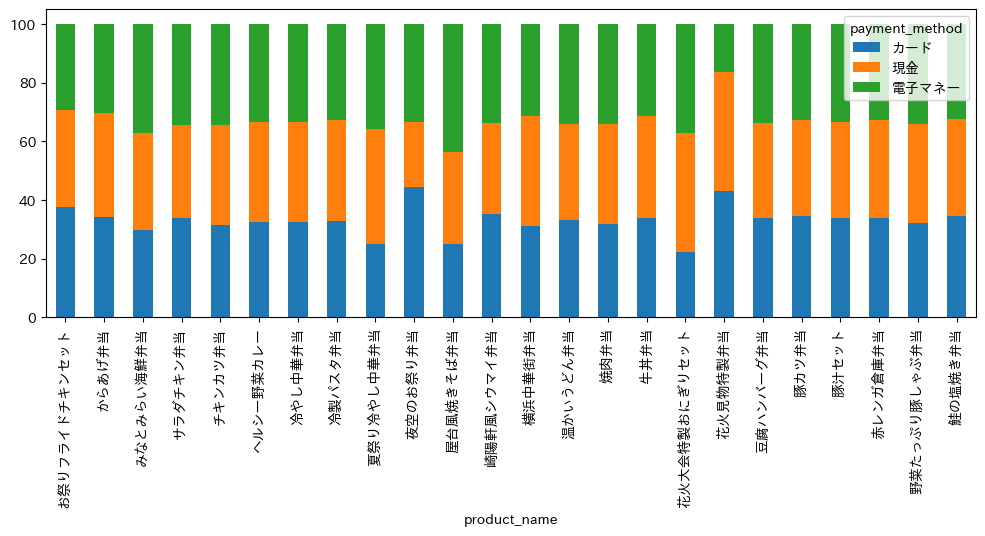

In [24]:
# --- ① 年間 × 商品 × 決済方法を集計 ---
df_year = (
    df_pos
    .with_columns(
        pl.col("datetime")
          .str.strptime(pl.Datetime, "%Y/%m/%d %H:%M")
          .dt.year()
          .alias("year")
    )
    .group_by(["product_name", "payment_method"])
    .agg(
        pl.col("amount").sum().alias("amount")
    )
    .sort("amount", descending=True)
)

# --- ② pandas に変換して pivot 形式へ ---
df_plot = df_year.to_pandas().pivot(
    index="product_name",
    columns="payment_method",
    values="amount"
)

# --- ③ 各商品の決済比率（%）に変換 ---
df_ratio = df_plot.div(df_plot.sum(axis=1), axis=0) * 100

# --- ④ 100% stacked bar chart（積み上げ）---
df_ratio.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 4)
)
